In [2]:
import sys
!{sys.executable} -m pip install pandas matplotlib seaborn

  Using cached pandas-3.0.0-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.4.1-cp312-cp312-win_amd64.whl.metadata (6.6 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached pandas-3.0.0-cp312-cp312-win_amd64.whl (9.7 MB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------ --------------------------- 2.6/8.1 MB 12.5 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 11.4 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 9.9 MB/s  0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------------------- -------- 1.8/2.3

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/sample_trials.csv')

In [5]:
print("missing values per column:")
print(df.isnull().sum())

missing values per column:
nct_id      0
title       0
gender     10
min_age     0
status      0
dtype: int64


In [6]:
df['age_numeric'] = df['min_age'].str.extract('(\d+)').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\FraganDsouza\AppData\Local\Temp\ipykernel_3484\1932461292.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['age_numeric'] = df['min_age'].str.extract('(\d+)').astype(float)


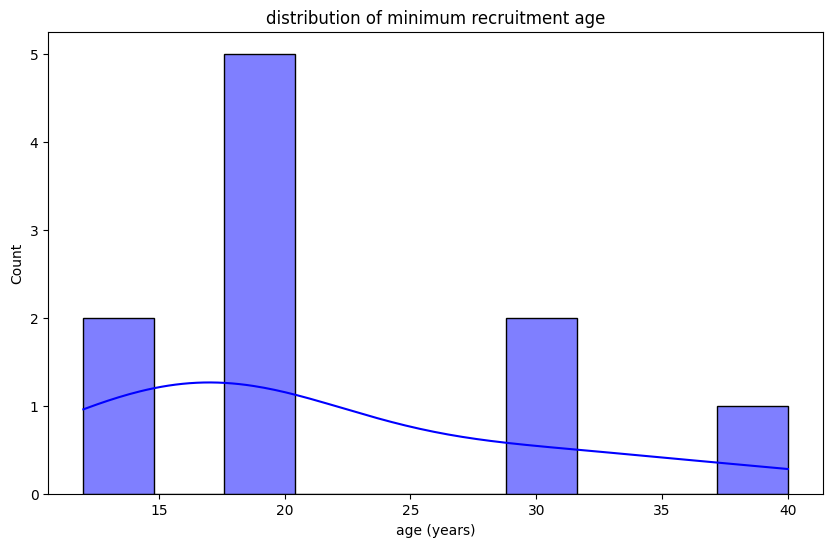

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age_numeric'], bins=10, kde=True, color='blue')
plt.title('distribution of minimum recruitment age')
plt.xlabel('age (years)')
plt.show()

In [ ]:
def check_trial_integrity(row):
    if pd.isna(row['gender']):
        return "REJECTED: Missing Gender Data"
    if row['age_numeric'] > 40:
        return "FLAGGED: Potential Age Bias"
    return "APPROVED"

df['policy_status'] = df.apply(check_trial_integrity, axis=1)
print(df[['nct_id', 'policy_status']])

        nct_id                  policy_status
0  NCT00327418  REJECTED: Missing Gender Data
1  NCT05072990  REJECTED: Missing Gender Data
2  NCT06041360  REJECTED: Missing Gender Data
3  NCT07355660  REJECTED: Missing Gender Data
4  NCT04709120  REJECTED: Missing Gender Data
5  NCT02682680  REJECTED: Missing Gender Data
6  NCT00657280  REJECTED: Missing Gender Data
7  NCT06935279  REJECTED: Missing Gender Data
8  NCT06884462  REJECTED: Missing Gender Data
9  NCT06382246  REJECTED: Missing Gender Data


In [9]:

df['is_flagged'] = df['age_numeric'] > 30

print("trials flagged for narrow age recruitment:")
print(df[df['is_flagged'] == True][['nct_id', 'title', 'min_age']])

trials flagged for narrow age recruitment:
        nct_id                                              title   min_age
0  NCT00327418  CARDS Is Designed To Show If Lowering Choleste...  40 Years
